In [68]:
%matplotlib inline
import numpy as np
import math
import csv
from proj1_helpers import *
from ML_methods import *
from plots import *
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [69]:
y0, x0, ids = load_csv_data("data_csv/train.csv", sub_sample=True)

In [70]:
print("y has shape {0}".format(y0.shape))
print("X has shape {0}".format(x0.shape))

y has shape (5000,)
X has shape (5000, 30)


In [71]:
def build_model_data(X, y0):
    y = y0
    num_samples = len(y)
    tx = np.c_[np.ones(num_samples), X[:,1]]
    return y, tx

In [72]:
x, mean_x, std_x = standardize(x0)
y, tx = build_model_data(x, y0)

In [73]:
tx.shape
print(tx)

[[1.         0.52216332]
 [1.         0.57023752]
 [1.         0.46701408]
 ...
 [1.         0.41988261]
 [1.         0.50987096]
 [1.         0.41222068]]


In [74]:
#test least squares 
y0 = least_squares(y, tx)
print(y0)

[ 1.80541406 -4.13951709]


In [75]:
def build_polynome(x, degree):
    #polynomial vector
    polynome = np.ones(len(x), 1)
    for degre in range(1, degree + 1):
        polynome = np.c_[polynome, np.power(x,degre)]
    return polynome

In [79]:
def polynomial_regression(y, tx):
    degrees = [1,2,3,4]
     # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # form dataset to do polynomial regression.
        txx = build_polynome(tx, degree)

        # least squares
        weights = least_squares(y, txx)

        # compute RMSE
        rmse = np.sqrt(2 * compute_mse(y, txx, weights))
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(y, tx, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

TypeError: data type not understood

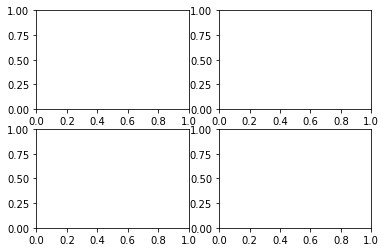

In [80]:
polynomial_regression(y, tx)